<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёт-эффективности-обогащения" data-toc-modified-id="Расчёт-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчёт эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-изменения-концентраций-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Анализ-изменения-концентраций-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ изменения концентраций металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях." data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях.</a></span></li></ul></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Создание-функции-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание функции для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Построение-модели." data-toc-modified-id="Построение-модели.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Построение модели.</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

Поставлена задача подготовить прототип модели машинного обучения, которая  должна предсказать коэффициент восстановления золота из золотосодержащей руды». Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
В нашем распоряжении данные с параметрами добычи и очистки.  
Для решения поставленной задачи:
1. Подготовим данные;
2. Проведём исследовательский анализ данных;
3. Построим и обучим модель.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.multioutput import MultiOutputRegressor
from catboost import CatBoostRegressor

## Подготовка данных

In [2]:
train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv', parse_dates=['date'])
test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv', parse_dates=['date'])
full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv', parse_dates=['date'])

In [3]:
def data_info(df):
    """Изучение датасета"""
    display(df.head())
    display(df.info())
    display(df.describe())
    print('Количество дубликатов =', df.duplicated().sum())
    # Построение корреляционной матрицы
    plt.figure(figsize=(50,50))
    corr_matrix = sns.heatmap(df.corr(),annot=True)
    corr_matrix.axes.set_title("Корреляционная матрица", fontsize=16)
    plt.show()

date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   
2 2016-01-15 02:00:00                     6.055926   
3 2016-01-15 03:00:00                     6.047977   
4 2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   
3                                 -500.857308   
4                                 -499.838632   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   
2                                 11.912783   
3                                 11.999550   
4                                 11.953070   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   
2                                 -501.133383   
3                                 -501.193686   
4                                 -501.053894   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   
2                                 10.070913   
3                                  9.970366   
4                                  9.925709   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   
2                                 -500.129135   
3                                 -499.201640   
4                                 -501.686727   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   
2                                  8.013877   
3                                  7.977324   
4                                  7.894242   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   
2                                 -500.517572   
3                                 -500.255908   
4                                 -500.356035   

   secondary_cleaner.state.floatbank6_a_air  \
0         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64       
 8   final.

None

final.output.concentrate_ag  final.output.concentrate_pb  \
count                 14148.000000                 14148.000000   
mean                      5.142034                    10.132960   
std                       1.369586                     1.654930   
min                       0.000000                     0.000000   
25%                       4.211620                     9.297355   
50%                       4.994652                    10.297144   
75%                       5.859540                    11.170603   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  13938.000000                 14149.000000   
mean                       9.202849                    44.003792   
std                        2.790516                     4.905261   
min                        0.000000                     0.000000   
25%                        7.484645                    43.276111   
50%                        8.845462                    44.872436   
75%                       10.487508                    46.166425   
max                       18.124851                    52.756638   

       final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
count           14149.000000          14149.000000          14049.000000   
mean               66.518832              9.607035              2.597298   
std                10.295402              2.319069              0.971843   
min                 0.000000              0.000000              0.000000   
25%                62.545817              7.997429              1.905973   
50%                67.432775              9.480270              2.592022   
75%                72.346428             11.003707              3.241723   
max               100.000000             19.552149              5.639565   

       final.output.tail_sol  final.output.tail_au  \
count           14144.000000          14149.000000   
mean               10.512122              2.918421   
std                 3.003617              0.903712   
min                 0.000000              0.000000   
25%                 8.811324              2.368607   
50%                10.514621              2.851025   
75%                11.933009              3.434764   
max                22.317730              8.197408   

       primary_cleaner.input.sulfate  ...  \
count                   14129.000000  ...   
mean                      133.320659  ...   
std                        39.431659  ...   
min                         0.003112  ...   
25%                       107.006651  ...   
50%                       133.018328  ...   
75%                       159.825396  ...   
max                       250.127834  ...   

       secondary_cleaner.state.floatbank4_a_air  \
count                              14143.000000   
mean                                  19.985454   
std                                    5.657723   
min                                    0.000000   
25%                                   14.990775   
50%                                   20.001789   
75%                                   24.990826   
max                                   30.115735   

       secondary_cleaner.state.floatbank4_a_level  \
count                                14148.000000   
mean                                  -478.696836   
std                                     50.736021   
min                                   -799.709069   
25%                                   -500.628656   
50%                                   -499.681450   
75%                                   -477.472413   
max                                   -245.239184   

       secondary_cleaner.state.floatbank4_b_air  \
count                              14148.000000   
mean                                  15.487065   
std                                    5.255655   
min                                    0.000000   
25%                

Количество дубликатов = 0


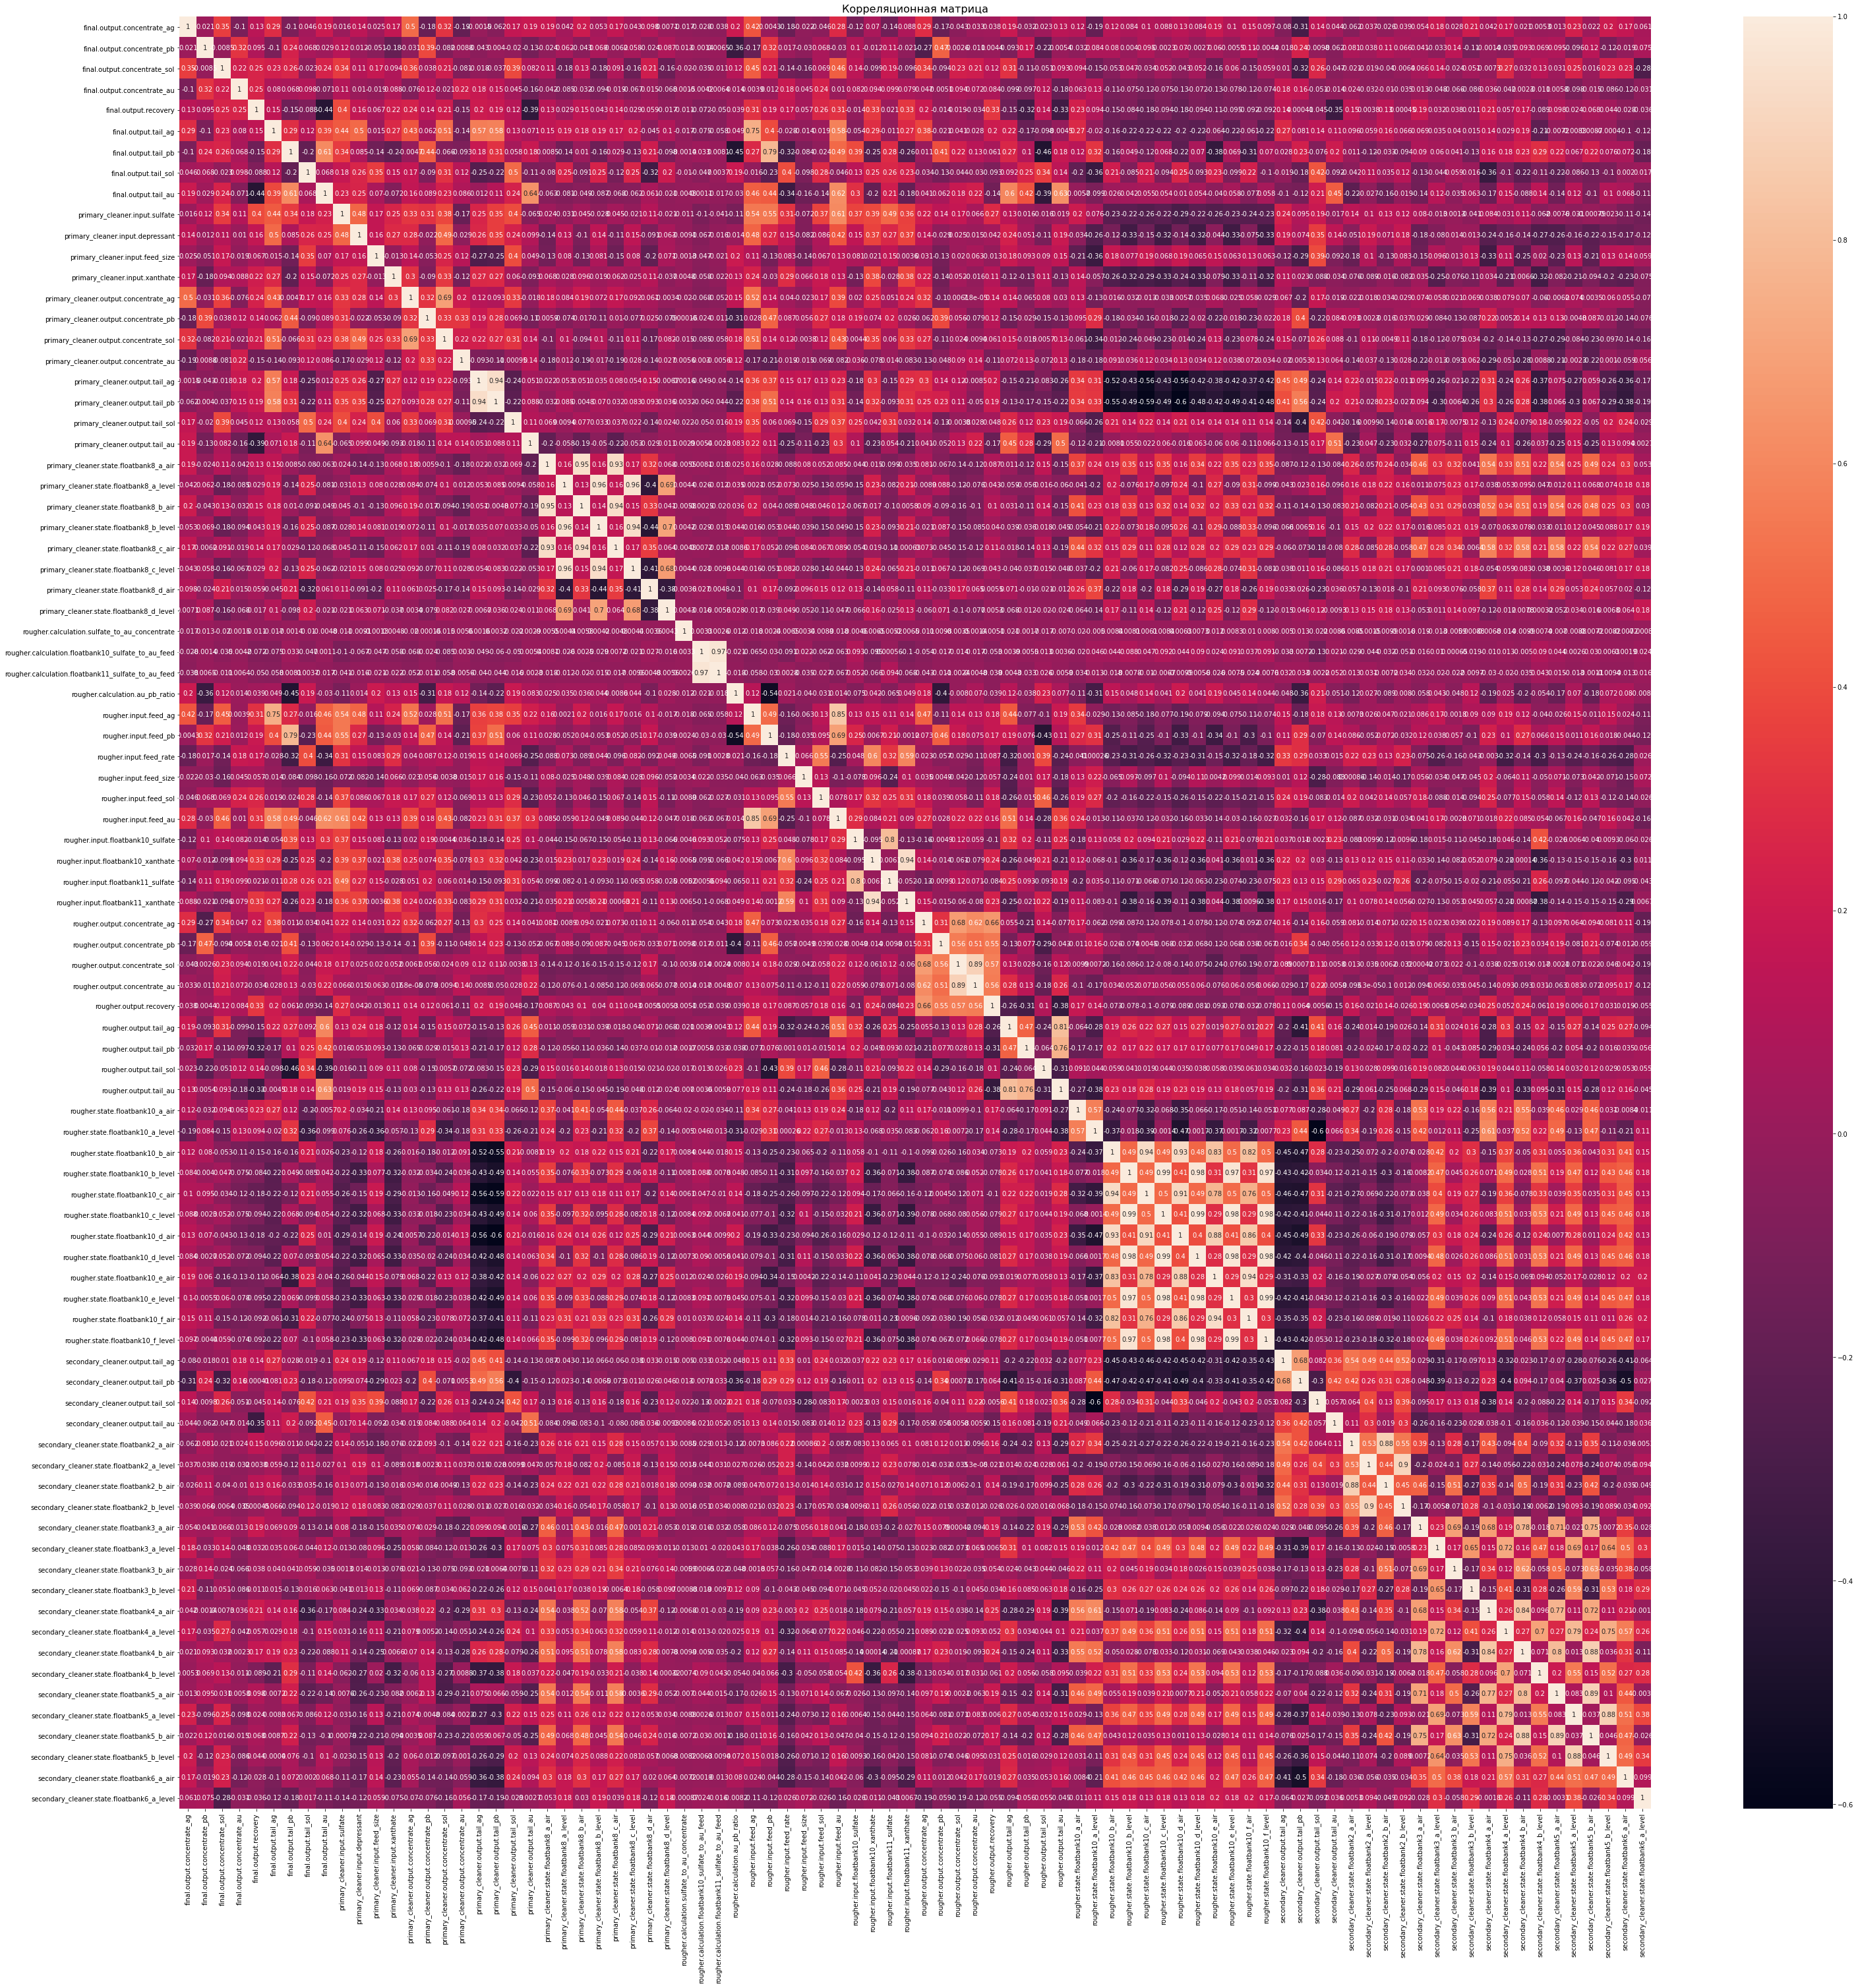

In [4]:
# Тренировочный датасет
data_info(train_df)

date  primary_cleaner.input.sulfate  \
0 2016-09-01 00:59:59                     210.800909   
1 2016-09-01 01:59:59                     215.392455   
2 2016-09-01 02:59:59                     215.259946   
3 2016-09-01 03:59:59                     215.336236   
4 2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   

   primary_cleaner.state.floatbank8_c_air  ...  \
0                             1400.102998  ...   
1                             1396.151033  ...   
2                             1398.075709  ...   
3                             1400.129303  ...   
4                             1402.172226  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 12.023554   
1                                 12.058140   
2                                 11.962366   
3                                 12.033091   
4                                 12.025367   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -497.795834   
1                                 -498.695773   
2                                 -498.767484   
3                                 -498.350935   
4                                 -500.786497   

   secondary_cleaner.state.floatbank4_b_air  \
0                                  8.016656   
1                                  8.130979   
2                                  8.096893   
3                                  8.074946   
4                                  8.054678   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -501.289139   
1                                 -499.634209   
2                                 -500.827423   
3                                 -499.474407   
4                                 -500.397500   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  7.946562   
1                                  7.958270   
2                                  8.071056   
3                                  7.897085   
4                                  8.107890   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -432.317850   
1                                 -525.839648   
2                                 -500.801673   
3          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5286 non-null   float64       
 2   primary_cleaner.input.depressant            5285 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5286 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

None

primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
count                    5286.000000                       5285.000000   
mean                      174.839652                          8.683596   
std                        43.027080                          3.072050   
min                         2.566156                          0.003839   
25%                       147.121401                          6.489555   
50%                       177.828489                          8.052207   
75%                       208.125438                         10.027764   
max                       265.983123                         40.000000   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
count                      5290.000000                     5286.000000   
mean                          7.266339                        1.383803   
std                           0.610219                        0.643474   
min                           5.650000                        0.004984   
25%                           6.890000                        0.907623   
50%                           7.250000                        1.197610   
75%                           7.600000                        1.797819   
max                          15.500000                        4.102454   

       primary_cleaner.state.floatbank8_a_air  \
count                            5.290000e+03   
mean                             1.539494e+03   
std                              1.167979e+02   
min                              5.445860e-32   
25%                              1.498936e+03   
50%                              1.585129e+03   
75%                              1.602077e+03   
max                              2.103104e+03   

       primary_cleaner.state.floatbank8_a_level  \
count                               5290.000000   
mean                                -497.665883   
std                                   19.952431   
min                                 -795.316337   
25%                                 -500.357298   
50%                                 -499.969164   
75%                                 -499.568951   
max                                  -57.195404   

       primary_cleaner.state.floatbank8_b_air  \
count                            5.290000e+03   
mean                             1.545174e+03   
std                              1.222246e+02   
min                              6.647490e-32   
25%                              1.498971e+03   
50%                              1.595622e+03   
75%                              1.602324e+03   
max                              1.813084e+03   

       primary_cleaner.state.floatbank8_b_level  \
count                               5290.000000   
mean                                -500.273098   
std                                   32.968307   
min                                 -799.997015   
25%                                 -500.703002   
50%                                 -500.028514   
75%                                 -499.293257   
max                                 -142.527229   

       primary_cleaner.state.floatbank8_c_air  \
count                            5.290000e+03   
mean                             1.527272e+03   
std                              1.225380e+02   
min                              4.033736e-32   
25%                              1.473230e+03   
50%                              1.549595e+03   
75%                              1.601144e+03   
max                              1.715054e+03   

       primary_cleaner.state.floatbank8_c_level  ...  \
count                               5290.000000  ...   
mean                                -498.330680  ...   
std                                   21.964876  ...   
min                                 -799.960571  ...   
25%                                 -501.018117  ...   
50%                                 -500.017711  ...   
75%                                

Количество дубликатов = 0


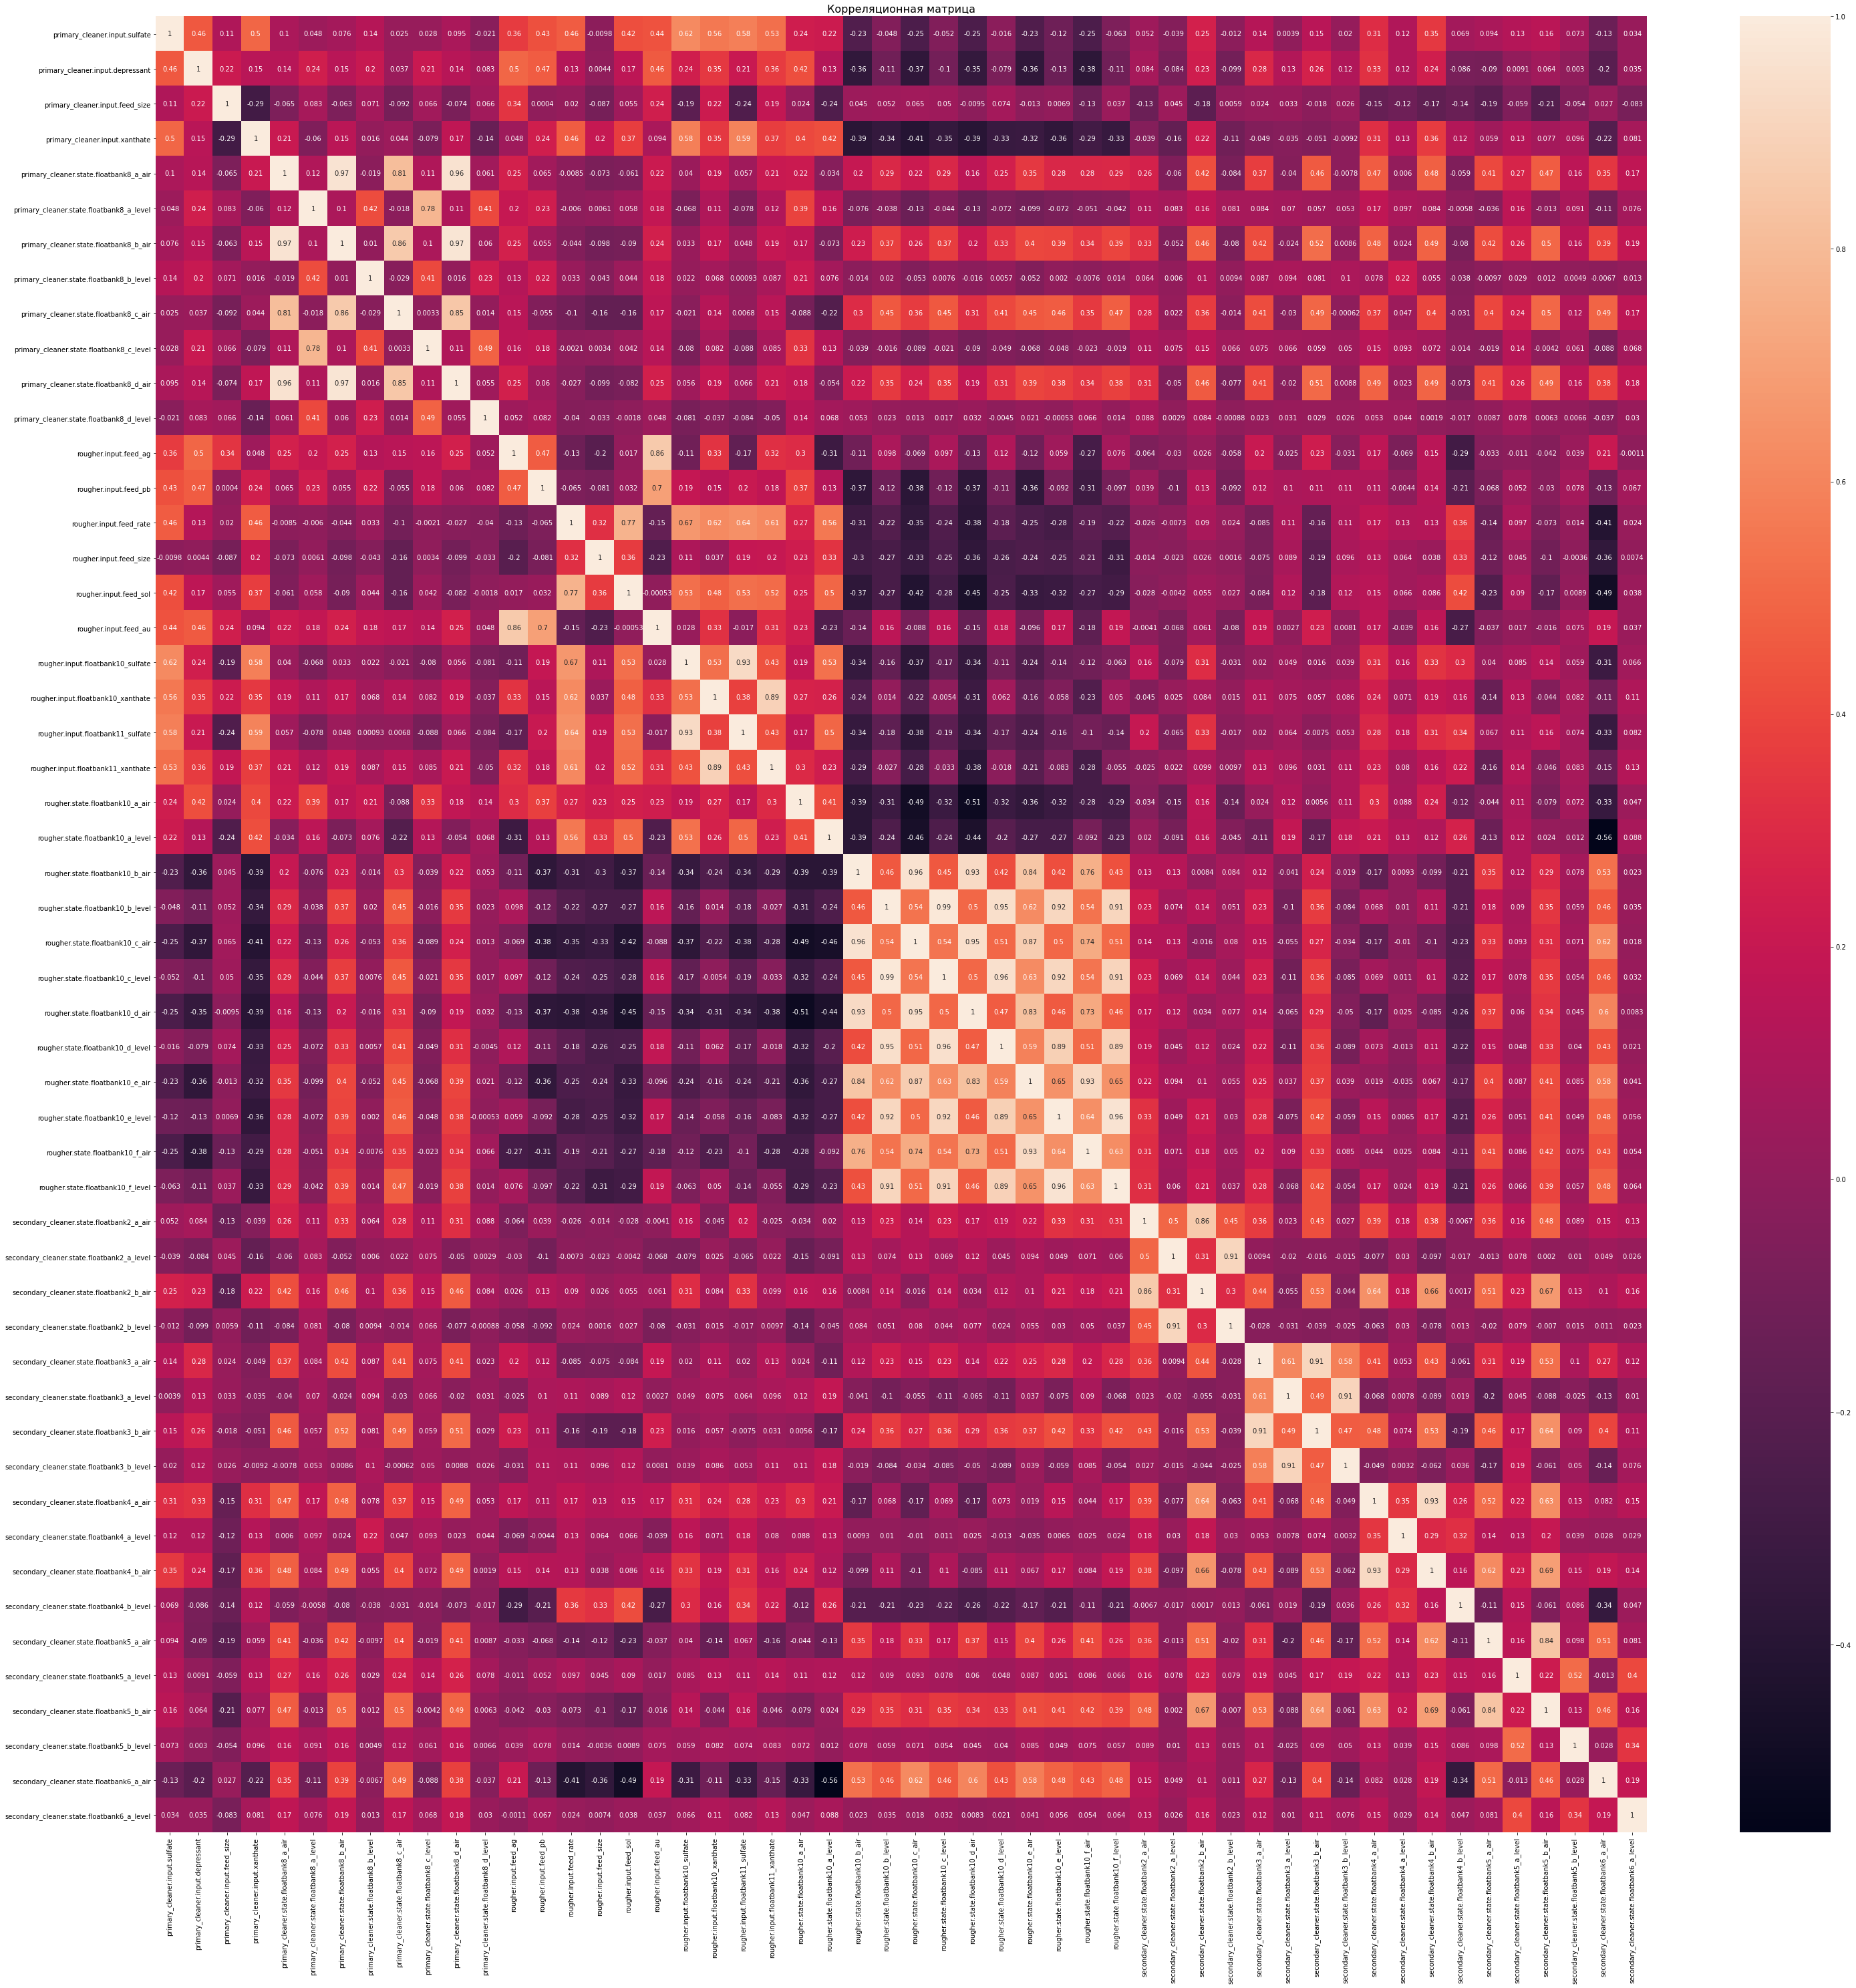

In [5]:
# Тестовый датасет
data_info(test_df)

date  final.output.concentrate_ag  \
0 2016-01-15 00:00:00                     6.055403   
1 2016-01-15 01:00:00                     6.029369   
2 2016-01-15 02:00:00                     6.055926   
3 2016-01-15 03:00:00                     6.047977   
4 2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   
3                                 -500.857308   
4                                 -499.838632   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   
2                                 11.912783   
3                                 11.999550   
4                                 11.953070   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   
2                                 -501.133383   
3                                 -501.193686   
4                                 -501.053894   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   
2                                 10.070913   
3                                  9.970366   
4                                  9.925709   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   
2                                 -500.129135   
3                                 -499.201640   
4                                 -501.686727   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   
2                                  8.013877   
3                                  7.977324   
4                                  7.894242   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   
2                                 -500.517572   
3                                 -500.255908   
4                                 -500.356035   

   secondary_cleaner.state.floatbank6_a_air  \
0         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19438 non-null  float64       
 2   final.output.concentrate_pb                         19438 non-null  float64       
 3   final.output.concentrate_sol                        19228 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19438 non-null  float64       
 7   final.output.tail_pb                                19338 non-null  float64       
 8   final.

None

final.output.concentrate_ag  final.output.concentrate_pb  \
count                 19438.000000                 19438.000000   
mean                      5.168470                     9.978895   
std                       1.372348                     1.669240   
min                       0.000000                     0.000000   
25%                       4.251240                     9.137262   
50%                       5.066094                    10.102433   
75%                       5.895527                    11.035769   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  19228.000000                 19439.000000   
mean                       9.501224                    44.076513   
std                        2.787537                     5.129784   
min                        0.000000                     0.000000   
25%                        7.722820                    43.402215   
50%                        9.218961                    45.011244   
75%                       10.947813                    46.275313   
max                       19.615720                    52.756638   

       final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
count           19439.000000          19438.000000          19338.000000   
mean               67.050208              9.688589              2.705795   
std                10.125840              2.328642              0.949077   
min                 0.000000              0.000000              0.000000   
25%                63.299712              8.062878              2.040119   
50%                68.172738              9.743623              2.748730   
75%                72.686642             11.134294              3.333216   
max               100.000000             19.552149              5.804178   

       final.output.tail_sol  final.output.tail_au  \
count           19433.000000          19439.000000   
mean               10.583728              3.042467   
std                 2.868782              0.922808   
min                 0.000000              0.000000   
25%                 8.938947              2.461138   
50%                10.622456              2.984909   
75%                12.104271              3.571351   
max                22.317730              8.245022   

       primary_cleaner.input.sulfate  ...  \
count                   19415.000000  ...   
mean                      144.624774  ...   
std                        44.464071  ...   
min                         0.003112  ...   
25%                       114.107029  ...   
50%                       143.232103  ...   
75%                       175.075656  ...   
max                       265.983123  ...   

       secondary_cleaner.state.floatbank4_a_air  \
count                              19433.000000   
mean                                  18.987674   
std                                    5.411058   
min                                    0.000000   
25%                                   14.975734   
50%                                   18.017481   
75%                                   23.012470   
max                                   30.115735   

       secondary_cleaner.state.floatbank4_a_level  \
count                                19438.000000   
mean                                  -485.894516   
std                                     47.758570   
min                                   -799.798523   
25%                                   -500.704892   
50%                                   -499.837793   
75%                                   -498.249730   
max                                   -245.239184   

       secondary_cleaner.state.floatbank4_b_air  \
count                              19438.000000   
mean                                  15.010366   
std                                    4.890228   
min                                    0.000000   
25%                

Количество дубликатов = 0


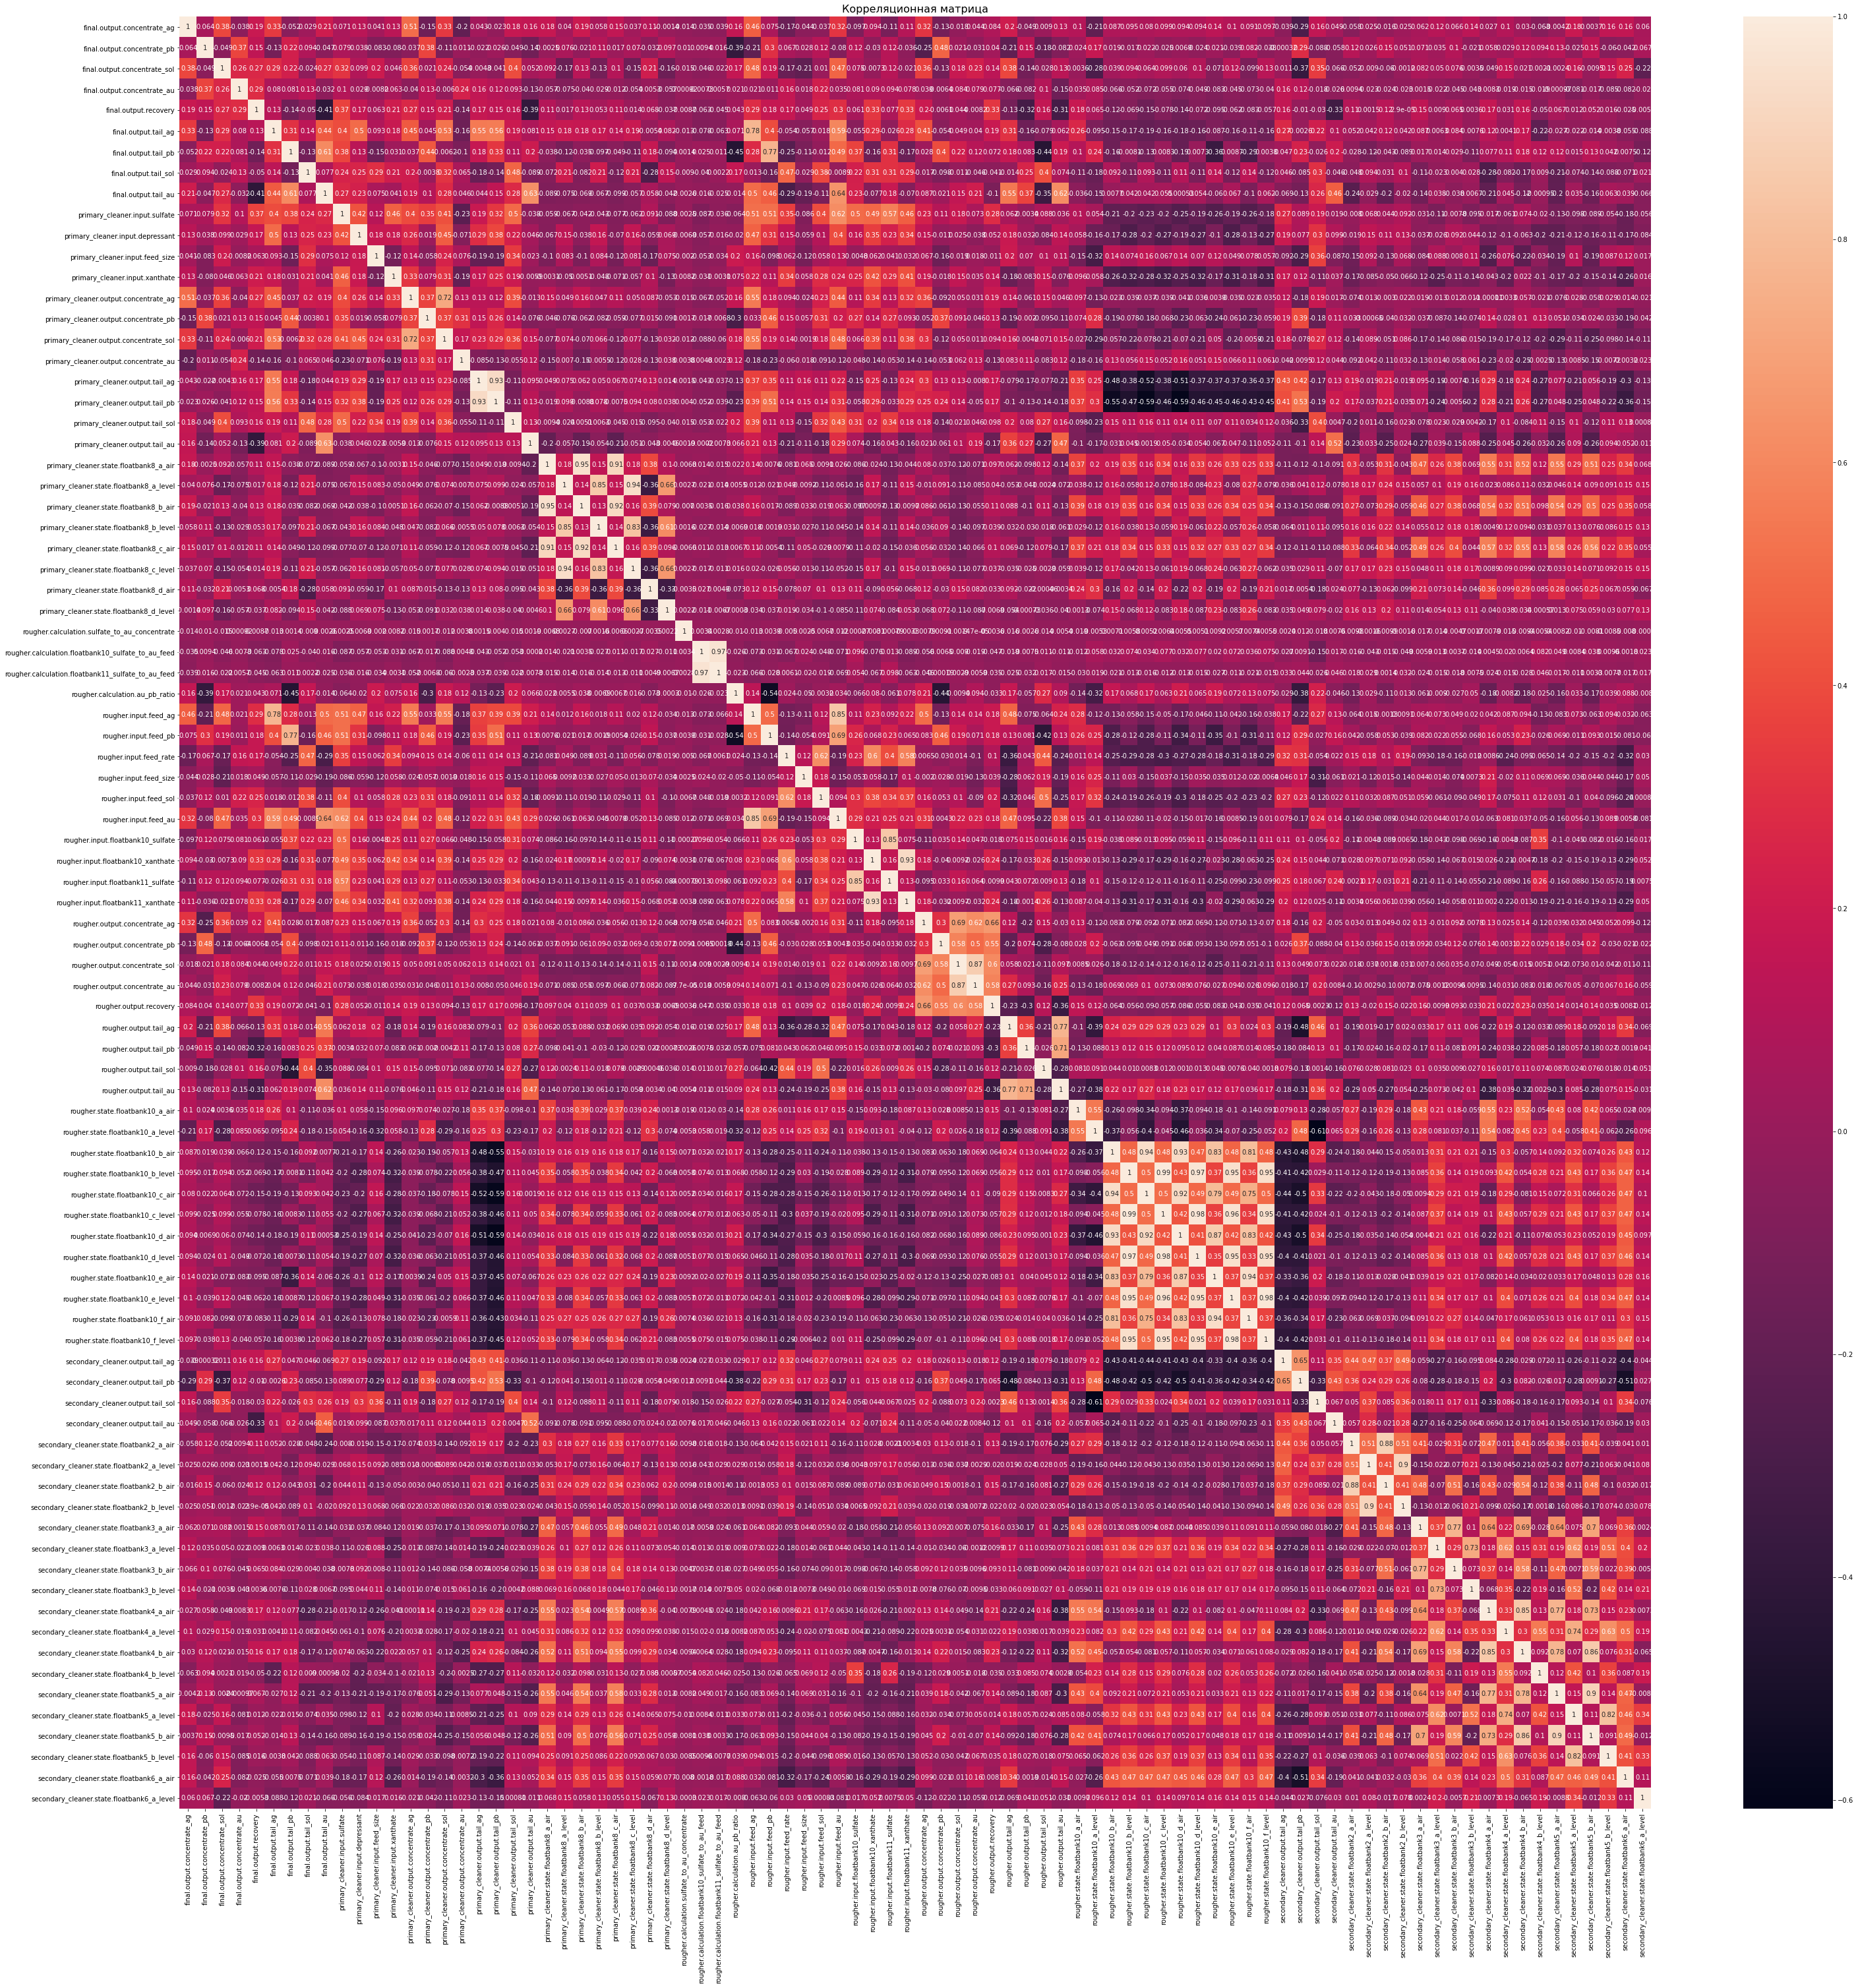

In [6]:
# Полный датасет
data_info(full_df)

**Вывод**
1. Данные загружены и изучены.
2. Присутствуют пропуски в нескольких колонках.

### Предобработка данных

Так как соседние данные в датасете похожи, заполнение пропусков произведём соседними значениями с помщью метода `ffill`.

In [7]:
# Заполнение пропусков в тренировочном датасете
train_df = train_df.ffill()
train_df.isna().sum().sum()

0

In [8]:
# Заполнение пропусков в тестовом датасете
test_df = test_df.ffill()
test_df.isna().sum().sum()

0

**Вывод** 

Пропуски обработаны.

### Расчёт эффективности обогащения 

Проверим, что эффективность обогащения рассчитана правильно. 
- Вычислите её на обучающей выборке для признака `rougher.output.recovery`. 
- Найдитём MAE между расчётами и значением признака.

In [9]:
def recovery(row):
    """ Расчёт эффективности обогащения 
        С - доля золота в концентрате после флотации/очистки;
        F — доля золота в сырье/концентрате до флотации/очистки;
        T — доля золота в отвальных хвостах после флотации/очистки """
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    
    return (C * (F - T))/(F * (C - T)) * 100

rougher_output_recovery = train_df.apply(recovery, axis=1)
print('MAE =', mean_absolute_error(train_df['rougher.output.recovery'], rougher_output_recovery))

MAE = 9.73512347450521e-15


**Вывод**

Расчитанная эффективность обогащения соответствует представленному в датафрейме.

### Анализ признаков, недоступных в тестовой выборке

Для анализа признаков, недоступных в тестовой выборке выведем на экрам данные признаки..

In [10]:
# Колонки, отсутствующие в тестоых данных
[x for x in train_df.columns if x not in test_df.columns]

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

**Вывод**
1. `rougher.output.recovery`, `final.output.recovery` - целевые признаки;
2. Признаки группы `final.output` могут быть источниками утечки данных для целевого признака `final.output.recovery`, так как характеризуют концентрат на выходе.
3. Признаки группы `rougher.output` могут быть источниками утечки данных для целевого признака `rougher.output.recovery`, так как характеризуют черновой концентрат после флотации.
4. Признаки группы `primary_cleaner.output` и `secondary_cleaner.output` характеризуют промежуточные этапы очистки, которые также не стоит добавлять в модель.
5. Признаки группы `rougher.calculation` содержат расчётные данные, которые могут быть расчитаны после окончания процесса очистки, и добавлять из в качестве признаков в модель будет неправильно. 


**Вывод по разделу**

В данном разделе произвели загрузку, анализ и предобработку данных. Данные подготовленны к дальнейшей работе с ними.

## Анализ данных

### Анализ изменения концентраций металлов (Au, Ag, Pb) на различных этапах очистки.

Посмотрм, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Для этого:
1. Рассчитаем средние значения концентрации металлов на каждом этапе очистки;
2. Сведём результаты в таблицу;
3. Построим графики.


In [11]:
# Концентрации серебра
ag_history = train_df[['rougher.input.feed_ag',
                       'rougher.output.concentrate_ag', 
                       'primary_cleaner.output.concentrate_ag', 
                       'final.output.concentrate_ag'
                      ]]
ag_history.columns = ['Сырьё', 'Флотация', 'Очистка 1', 'Очистка 2']
# Концентрации свинца
pb_history = train_df[['rougher.input.feed_pb',
                       'rougher.output.concentrate_pb', 
                       'primary_cleaner.output.concentrate_pb', 
                       'final.output.concentrate_pb'
                      ]]
pb_history.columns = ['Сырьё', 'Флотация', 'Очистка 1', 'Очистка 2']
# Концентрации золота
au_history = train_df[['rougher.input.feed_au',
                       'rougher.output.concentrate_au', 
                       'primary_cleaner.output.concentrate_au', 
                       'final.output.concentrate_au'
                      ]]
au_history.columns = ['Сырьё', 'Флотация', 'Очистка 1', 'Очистка 2']


In [12]:
# Средние концентрации вносим в итоговую таблицу
metal_concentrate = pd.DataFrame(data=ag_history.mean(), columns=['ag'])
metal_concentrate['pb'] = pb_history.mean()
metal_concentrate['au'] = au_history.mean()

ag         pb         au
Сырьё       8.579195   3.505465   7.866577
Флотация   11.775812   7.664555  19.439958
Очистка 1   8.200916   9.568544  32.386836
Очистка 2   5.141921  10.132848  44.003792

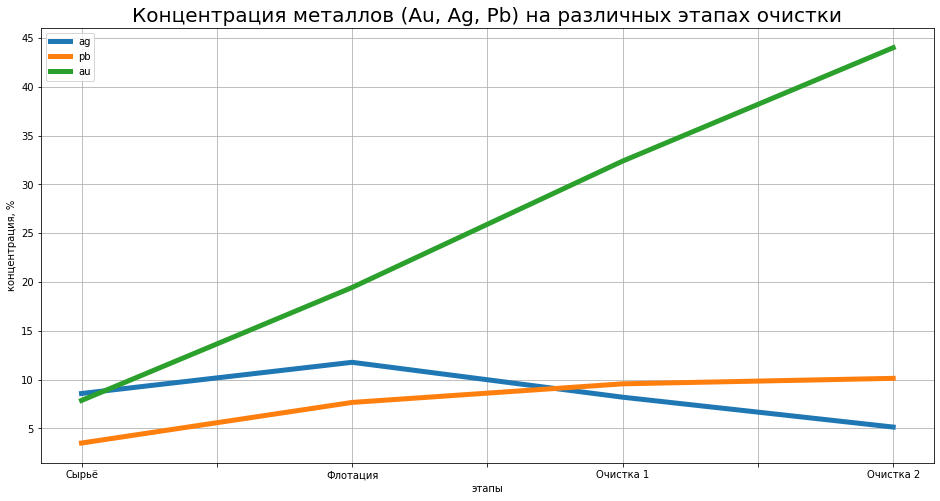

In [13]:
# ax = plt.subplots()
# Визуализация
ax = metal_concentrate.plot(linewidth=5, figsize=(16,8), grid=True)
ax.set(ylabel='концентрация, %', xlabel= 'этапы')
ax.set_title('Концентрация металлов (Au, Ag, Pb) на различных этапах очистки', fontsize=20)
plt.show;
# Вывод таблицы
metal_concentrate

**Вывод**

На каждом этапе очистки, концентрация золота повышается в реднем на 12%, достигая 44% на выходе. При этом концентрация серебра снижается на 3%, а концентрация свинца увеличивается лишь на 1-2%. Это говорит о том, что технологический процесс, нацеленный на выделение из породы золота эфективен.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. 

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения будут сильно отличаются друг от друга, оценка модели будет неправильной. Для оценки распределений:
1. Построим гистораммы распределений;
2. Построим диаграммы "Ящик с усами" для распределений;
3. Рассчитаем показатели распределений.

In [14]:
# Рассматриваемые признаки выделим в отдельный ДФ
df_feed_size = pd.DataFrame(train_df['rougher.input.feed_size'])
df_feed_size['Тестовая выборка']  = test_df['rougher.input.feed_size']
df_feed_size.columns=['Тренировочная выборка', 'Тестовая выборка']
# Расчт среднего, медианы, дисперсии и стандартного отклонения
distrib_tabl = df_feed_size[['Тренировочная выборка', 'Тестовая выборка']].agg(['mean', 'median', 'var', 'std' ])
distrib_tabl.index=['Среднее', 'Медиана', 'Дисперсия', 'Стандартное отклонение']

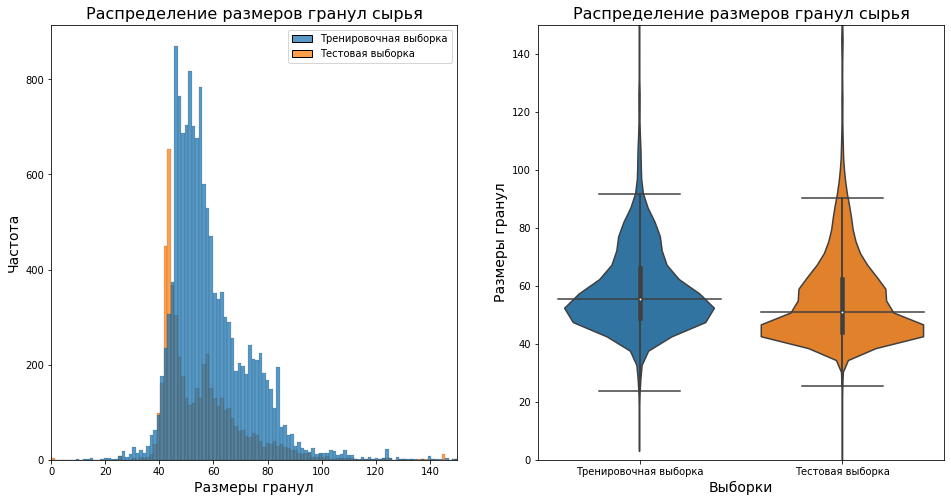

Тренировочная выборка  Тестовая выборка
Среднее                             60.239856         55.952754
Медиана                             55.269784         50.846843
Дисперсия                          529.244270        364.059149
Стандартное отклонение              23.005310         19.080334

In [15]:
# Построение гистограмм 
fig = plt.figure(figsize=(16,8))
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.axes.set_title("Распределение размеров гранул сырья", fontsize=16)
ax_1.set_xlabel("Размеры гранул", fontsize=14)
ax_1.set_ylabel("Частота", fontsize=14)
ax_1 = sns.histplot(data=df_feed_size)
ax_1.set_xlim(0, 150)

# Построение распределений violinplot
ax_2 = fig.add_subplot(1, 2, 2)
ax_2 = sns.boxplot(data=df_feed_size, showfliers=False, showbox=False)
ax_2 = sns.violinplot(data=df_feed_size)
ax_2.axes.set_title("Распределение размеров гранул сырья", fontsize=16)
ax_2.set_xlabel("Выборки", fontsize=14)
ax_2.set_ylabel("Размеры гранул", fontsize=14)
ax_2.set_ylim(0, 150)

plt.show()

# Вывод характеристик распределений в табличном виде
distrib_tabl

**Вывод**

По построенным гистограммам видно, что распределения размеров гранул сырья на обучающей и тестовой выборках имеют схожий характер. Средние значения и медианы выборок отличаются не значительно. Таким образом, можно считать, что  распределения размеров гранул сырья на обучающей и тестовой выборках отличаются друг от друга не сильно, и оценка модели будет правильной.

### Исследование суммарной концентрации всех веществ на разных стадиях.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
Для данного исследования:
1. Рассчитаем суммарные концентрации металлов на каждом этапе очистки;
2. Построим гистограммы распределения.

In [16]:
# средняя суммарная концентрация всех веществ в сырье
concentrate_df = pd.DataFrame(train_df[['rougher.input.feed_ag', 
                                        'rougher.input.feed_pb',
                                        'rougher.input.feed_sol',
                                        'rougher.input.feed_au']].sum(axis=1),
                              columns=['Сырьё'])


concentrate_df['Флотация'] = train_df[['rougher.output.concentrate_ag', 
                                                         'rougher.output.concentrate_pb',
                                                         'rougher.output.concentrate_sol',
                                                         'rougher.output.concentrate_au']].sum(axis=1)

concentrate_df['Очистка 1'] = train_df[['primary_cleaner.output.concentrate_ag',
                                                                 'primary_cleaner.output.concentrate_pb',
                                                                 'primary_cleaner.output.concentrate_sol',
                                                                 'primary_cleaner.output.concentrate_au']].sum(axis=1)

concentrate_df['Финальный концентрат'] = train_df[['final.output.concentrate_ag', 
                                                       'final.output.concentrate_pb',
                                                       'final.output.concentrate_sol',
                                                       'final.output.concentrate_au']].sum(axis=1)

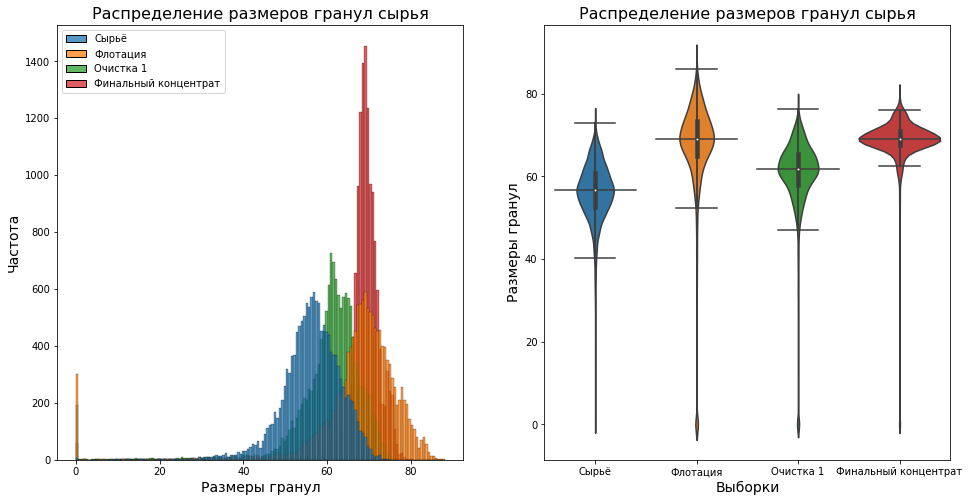

In [17]:
# Построение гистограмм 
fig = plt.figure(figsize=(16,8))
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.axes.set_title("Распределение размеров гранул сырья", fontsize=16)
ax_1.set_xlabel("Размеры гранул", fontsize=14)
ax_1.set_ylabel("Частота", fontsize=14)
ax_1 = sns.histplot(data=concentrate_df)
# ax_1.set_xlim(0, 10)

# Построение распределений violinplot
ax_2 = fig.add_subplot(1, 2, 2)
ax_2 = sns.boxplot(data=concentrate_df, showfliers=False, showbox=False)
ax_2 = sns.violinplot(data=concentrate_df)
ax_2.axes.set_title("Распределение размеров гранул сырья", fontsize=16)
ax_2.set_xlabel("Выборки", fontsize=14)
ax_2.set_ylabel("Размеры гранул", fontsize=14)
# ax_2.set_ylim(0, 150)

plt.show()

# Вывод характеристик распределений в табличном виде
# distrib_tabl

In [18]:
concentrate_df.min()

Сырьё                   0.04
Флотация                0.00
Очистка 1               0.00
Финальный концентрат    0.00
dtype: float64

**Вывод:** 

Проанализировав распределения, можно сделать вывод, что в данных присутствуют значения концентраций металлов равные нулю, чего быть не должно. Это явные ошибки в данных, которые можно отнести к пропускам. Также, возможно, это следствие сбоя измерительного оборудования. Такие данные могут негативно влиять на качество работы создаваемой модели. Строки с такими значениями следует удалить из тренировочного датасета.

In [19]:
train_df = train_df.drop(train_df[train_df['rougher.input.feed_ag'] < 0.02].index)
train_df = train_df.drop(train_df[train_df['rougher.output.concentrate_ag'] < 0.02].index)
train_df = train_df.drop(train_df[train_df['primary_cleaner.output.concentrate_ag'] < 0.02].index)
train_df = train_df.drop(train_df[train_df['final.output.concentrate_ag'] < 0.02].index)

**Вывод:** 

Если проанализировать изменение средних значений суммарной концентрайии металлов от этапа к этапку, можно сделать следующие выводы: После этапа обогощения, суммарная концентрайия металлов повышается в среднем на 10% по отношению к суммарной концентрации металлов в сырье. После двух этапов очиски, суммарная концентрация металлов значительно не повышается. Не логично выглядит понижение концентрации металлов после первого этапа очистки. Данный показатель не повлияет на построение модели, так как данный признак не входит в число признаков тестовой выборки. Однако, эти показатели требуют проверки на производстве.

**Вывод по разделу**

В данном разделе был выполнен анализ изменения концентрации металлов на каждом этапе очистки, анализ суммарной концентрации веществ на каждй стадии очистки, анализ распределения размеров гранул в тренировочной и тестовой выборках. 

По результатам анализа концентраций металлов, можно сделать вывод, что концентрация золота от этапа к этапу повышается(суммарно на 35%), концентрация других металлов существенно не изменяется. Суммарная концентрация металлов при этом повышается суммарно на 12%. Таким образом можно судить об эффективности процесса добычи золотосодержащего концентрата из поступающей не очищенной руды.  

Распределение размеров гранул на тренировочной и тестовой выборках имеют схожий характер, и позволяют правильно оценить будущую модель машинного обучения.

## Построение модели

Построение модели машинного обучения, позволяющей прогнозировать коэффициент восстановления золота из золотосодержащей руды, будим производить следующим образом:
1. Создадим функцию для вычисления метрики качества, наиболее подходящей для решения поставленной задачи;
2. Создадим, обучим и выберем лучшую модель;
3. Проверим качество модели.
4. Проверим модель на адекватность.

### Создание функции для вычисления итоговой sMAPE.

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).
Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных.  Она одинаково учитывает масштаб и целевого признака, и предсказания.
1. Напишим функцию для вычисления итоговой sMAPE;
2. Для обеспечения возможности использовать данную метрику в инструментах scikitlearn, создадим оценщик на основе созданной функции. 

In [20]:
def sMAPE(Y, Y_p):
    """ Функция для рассчёта sMAPE
        Y - истинные значения
        Y_p - предсказанные значения
    """
    # Если входные данные pandas DataFrame то преобразуем в список
    if type(Y) == pd.core.frame.DataFrame or type(Y) == pd.core.series.Series:
        Y = Y.values
    if type(Y_p) == pd.core.frame.DataFrame or type(Y_p) == pd.core.series.Series:
        Y_p = Y_p.values
    # Расчёт 
    S = np.mean(abs(Y-Y_p)/((abs(Y)+abs(Y_p)+0.00000001)/2))
    return S*100

def fin_sMAP(y_true, y_pred):
    """ Функция рассчёта итогового sMAPE
        y_true - истинные значения
        y_pred - предсказанные значения
        Данные поступающие в функцию содержат по две колонки.
        В первой 'rougher.output.recovery'.
        Во второй 'final.output.recovery'.
    """
    return sMAPE(y_true[y_true.columns[0]], y_pred[:,0])*0.25 + sMAPE(y_true[y_true.columns[1]], y_pred[:,1])*0.75

# Создаём скорер для перекрёстной проверки и подбора пораметров
fin_sMAP_error = make_scorer(sMAPE, greater_is_better=False) # Скорер для двух целевых признаков
sMAP_error = make_scorer(sMAPE, greater_is_better=False)     # Скорер для одного целевого признака

**Вывод**

Создали функцию для рассчёта итоговой sMAPE и скорер для использования в инструментах библиотеки scikitlearn.

### Построение модели.

1. Обучим разные модели, подберём гиперпараметры и оценим их качество кросс-валидацией. 
    - Линейная регрессия;
    - Дерево решений;
    - Случайный лес;
    - CatBoostRegressor.
2. Выберем лучшую модель, затем проверим её на тестовой выборке.

Необходимо спрогнозировать сразу две величины:
- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

In [21]:
# Определение признаков и целевого признака
features = train_df[test_df.columns].drop('date', axis=1)
target = train_df[['rougher.output.recovery', 'final.output.recovery']]


#### Линейная регрессия

In [22]:
%%time
# Линейная регрессия
lin_reg = LinearRegression(normalize=True)
# Перекрёстная проверка модели
cross_val_score(lin_reg, features, target, cv=5, scoring=fin_sMAP_error).mean()

CPU times: user 1.18 s, sys: 1.45 s, total: 2.62 s
Wall time: 2.62 s


-9.15073991625519

**Вывод:**
На линейной модели метрика sMAPE = 9,15%. Много это или мало покажет обучение других моделей

#### Дерево решений

Для данной модели произведём проверку кроссвалидацией с подбором гиперпараметров по сетке.

In [23]:
%%time
# Дерево с автоподбором параметров
parametrs_tr = {'max_depth': range(1,15)}

tree_reg = DecisionTreeRegressor(random_state=5555)
grid_tree_reg = GridSearchCV(tree_reg, parametrs_tr, scoring=fin_sMAP_error, cv=4)
grid_tree_reg.fit(features, target)
print('Параметры модели:', grid_tree_reg.best_params_)
print('Лучший fin_sMAEP модели:', grid_tree_reg.best_score_)
best_tr = grid_tree_reg.best_estimator_

Параметры модели: {'max_depth': 4}
Лучший fin_sMAEP модели: -9.007272913900382
CPU times: user 22.8 s, sys: 17.3 ms, total: 22.8 s
Wall time: 24.2 s


**Вывод:**
На данной модели метрика sMAPE = 9.0%. Этот результат лучше чем у линейной регресии.

#### Случайный лес

Время обучения и подбора гиперпараметров данной модели сильно больше чем у предъидущих моделей и достигает нескольких часов.
Поэтому, для сокращения времени подбора гиперпараметров будем действовать в следующей последовательности:
1. Сначала произведём пробное обучение модели. 
2. Затем определим признаки вносящие наибольший вклад в обучение модели. Подбор гиперпараметров и оценку перекрёстной валидацией будем производить только по этим признакам. Действуя таким образом сократится время подбора гиперпарамеров, но будет риск подстроить модель под ограниченное число признаков, что может негативно сказаться на оптимальности подобранных гиперпараметров. 
3. Учитывая данный риск, после процесса подбора гиперпараметров на сокращённом количестве признаков, проверим модель на полном количестве признаков.

In [24]:
%%time
# Пробное обучение модели
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=5, random_state=5555)
cross_val_score(rf_reg, features, target, cv=4, scoring=fin_sMAP_error).mean()

CPU times: user 3min 35s, sys: 83.3 ms, total: 3min 35s
Wall time: 3min 39s


-8.701302570400271

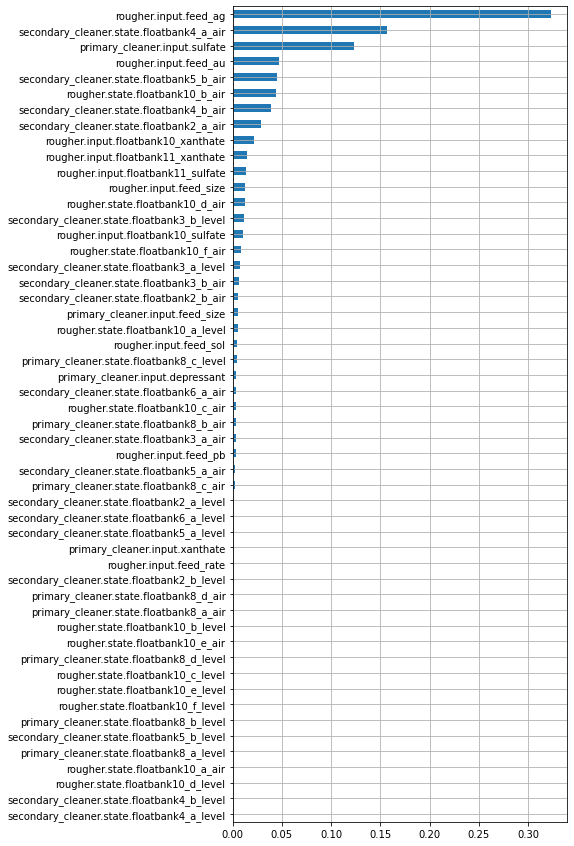

In [25]:
# Обучение модели
rf_reg.fit(features, target)
# Выделим наиболее важные признаки
efectiv_score = pd.DataFrame(data={'score': rf_reg.feature_importances_}, 
                            index=features.columns).sort_values(by='score')
# Выведем их на экран
efectiv_score.plot(kind='barh', grid=True, figsize=(6,15), legend=False);

In [26]:
# Отсеим признаки эфективность которых < 0.01
efectiv_score = efectiv_score[efectiv_score['score'] > 0.01]
# Список колонок эфективность которых < 0.01
efectiv_columns = efectiv_score.index
# Определим эфективные признаки
features_efectiv = features[efectiv_columns]

In [27]:
%%time
# Случайный лес с автоподбором параметров
parametrs = { 'n_estimators': randint(1,1000),
              'max_depth': randint(1,30) }

rf_reg = RandomForestRegressor(random_state=5555)
randCV_rfr = RandomizedSearchCV(rf_reg, parametrs, scoring=fin_sMAP_error, cv=4, n_iter=10, random_state=1234)
randCV_rfr.fit(features_efectiv, target)
print('Параметры модели:', randCV_rfr.best_params_)
print('Лучший fin_sMAE модели:', randCV_rfr.best_score_)

Параметры модели: {'max_depth': 7, 'n_estimators': 54}
Лучший fin_sMAE модели: -8.904245033165658
CPU times: user 33min 27s, sys: 3.56 s, total: 33min 31s
Wall time: 34min 3s


In [28]:
# Запомним лучшую модель
best_model = randCV_rfr.best_estimator_

In [29]:
# Проверка модели на всех признаках
cross_val_score(best_model, features, target, cv=5, scoring=fin_sMAP_error).mean()

-8.489038515093156

**Вывод:** Данная модель показала sMAPE = 8.5%

#### CatBoost
CatBoostRegressor не допускает передачи двух целевых признаков в однк модель, поэтому:
1. Разделим целевые признаки;
2. Для каждого целевого признака обучим своюмодель CatBoostRegressor с подбором гиперпараметров;
3. Рассчимитаем итоговый fin_sMAE.

In [30]:
# Разделим целевые признаки
target_roug = target['rougher.output.recovery']
target_final = target['final.output.recovery']

In [31]:
%%time
# CatBoost с автоподбором параметров для целевого признака ougher.output.recovery
parametrs = { 'l2_leaf_reg': randint(1,10),
              'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.06, 0.07, 0.08, 0.1, 0.2, 0.5, 0.8, 1],
               'depth' : randint(1,10)}

cat_rouger = CatBoostRegressor(iterations=200, silent = True)
randCV_cat_rouger = RandomizedSearchCV(cat_rouger, parametrs, scoring=sMAP_error, cv=4, n_iter=10, random_state=5555)
randCV_cat_rouger.fit(features, target_roug)
print('Параметры модели:', randCV_cat_rouger.best_params_)
print('Лучший sMAPE модели:', randCV_cat_rouger.best_score_)

Параметры модели: {'depth': 1, 'l2_leaf_reg': 4, 'learning_rate': 0.2}
Лучший sMAPE модели: -6.834146926138935
CPU times: user 3min 24s, sys: 1.92 s, total: 3min 26s
Wall time: 4min 22s


In [32]:
%%time
# CatBoost с автоподбором параметров для целевого признака final.output.recovery
parametrs = { 'l2_leaf_reg': randint(1,10),
              'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.06, 0.07, 0.08, 0.1, 0.2, 0.5, 0.8, 1],
               'depth' : randint(1,10)}

cat_final = CatBoostRegressor(iterations=200, silent = True)
randCV_cat_final = RandomizedSearchCV(cat_final, parametrs, scoring=sMAP_error, cv=4, n_iter=10, random_state=5555)
randCV_cat_final.fit(features, target_final)
print('Параметры модели:', randCV_cat_final.best_params_)
print('Лучший sMAPE модели:', randCV_cat_final.best_score_)

Параметры модели: {'depth': 1, 'l2_leaf_reg': 2, 'learning_rate': 0.08}
Лучший sMAPE модели: -9.185890900962066
CPU times: user 3min 15s, sys: 1.46 s, total: 3min 17s
Wall time: 4min 6s


In [33]:
best_cat_rouger = randCV_cat_rouger.best_estimator_
best_cat_final = randCV_cat_final.best_estimator_
randCV_cat_rouger.best_score_*0.25 + randCV_cat_final.best_score_*0.75


-8.597954907256284

**Вывод:** Показатель sMAPE данной модели составил 8.5%. 

**Вывод** 

Наилучшие показатели sMAPE показали модели Случайный Лес и CatBoostRegressor. Окончательный выбор модели произведём после тестирования данных моделей на тестовой выборке.


### Проверка модели на тестовой выборке

Проверим модели Случайный Лес и CatBoostRegressor на тестовой выборке. Признаки тестовой выборки у нас есть, а целевые признаки получим по соответствующим строкам полной выборки. 


In [34]:
# Определим признаки и целевые признаки для теста
feture_test = test_df.drop('date', axis=1)
# Целевые признаки для теста возмём из полной выборки с помощью соединения таблиц по колонке Дата
target_test = test_df.merge(full_df[['date', 'rougher.output.recovery', 'final.output.recovery']])
target_test = target_test[['rougher.output.recovery', 'final.output.recovery']]
# Разделим целевые признаки
target_test_roug = target_test['rougher.output.recovery']
target_test_final = target_test['final.output.recovery']

In [35]:
# Обучим лучшую модель Случайного леса на полной тренировачной выборке
best_model.fit(features, target)

RandomForestRegressor(max_depth=7, n_estimators=54, random_state=5555)

In [36]:
# Предсказания по признакам тестовой выборки
predictions_test = best_model.predict(feture_test)
# Посчитаем sMAPE
fin_sMAP(target_test, predictions_test)

9.632710370670075

In [37]:
# Обучим лучшую модель CatBoost на полной тренировачной выборке 
best_cat_rouger.fit(features, target_roug)
best_cat_final.fit(features, target_final)

In [38]:
# Предсказания по признакам тестовой выборки
predictions_test = np.empty((len(target_test),2))
predictions_test[:,0] = best_cat_rouger.predict(feture_test)
predictions_test[:,1] = best_cat_final.predict(feture_test)
# Посчитаем sMAPE
fin_sMAP(target_test, predictions_test)

8.485514572003014

**Вывод**

При проверке моделей на тестовой выборке, модель Случайный лес показала результат хуже, чем CatBoostRegressor. Значение показателя sMAPE на тестовой выборке составило 8.5%, что соответствует показателю, полученному при перекрёстной проверке модели на тренировачной выборке. Это говорит об эффективности построенной модели.

### Проверка модели на адекватность

Для того, чтобы убедится, что модель работает адекватно, сравним её работу с работой фиктивной модели.

In [39]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(features, target)
dummy_predictions = dummy.predict(feture_test)
fin_sMAP(target_test, dummy_predictions)

9.831649523665487

**Вывод**

Константная модель показывает результат хуже чем созданная модель. Можно сделать вывод, что созданная модель работает адекватно.

**Вывод по разделу**

Создана функция по расчёту метрики качества sMAPE, адаптирована для её применения в функциях кроссвалидации. Обучено и проверено четыре модели. Наибольшую эффективность показала модель CatBoostRegressor, которая была проверена на тестовой выборке. Именно её следует отправить в производство. 

## Общий вывод

Была поставлена задача построения модели машинного обучения, которая  должна предсказать коэффициент восстановления золота из золотосодержащей руды.

На этапе подготовки данных была произведена предобработка данных - пропуски заменены медианными значениями в соответствующих колонках. Проведена проверка правильности рассчёта эффективности обогащения - эфективность обогащения в данных соответствует расчётной. Произведён анализ признаков недоступных в тестовой выборке - недостающие признаки не повлияют на качество модели.

На этапе анализа данных произвели анализ концентрации металлов как по отдельности так и суммарно на разных этапах очистки и обогащения - концентрация золота повышается, остальных металлов не изменяется. Сравнили распределения размера гранул сырья в тренировочной и тестовой выборках. Распределения имеют схожий характер, что позволит правильно оценить создаваемую модель.

Далее, была создана метрика качества sMAPE, которая одинаково учитывает масштаб и целевого признака, и предсказания. Обучены и проверены с помощью кроссвалидации четыре модели: линейная регрессия, дерево решений, случайный лес, CatBoostRegressor. Наибольшую эффективность показала модель CatBoostRegressor. При проверке выбранной модели на тестовой выборке, она доказала свою эффективность.

Таким образом, поставленная задача по построению модели машинного обучения, которая  должна предсказать коэффициент восстановления золота из золотосодержащей руды выполнена. 
